In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("Pokemon.csv", index_col = 0)

In [8]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


**Scatter Plot**

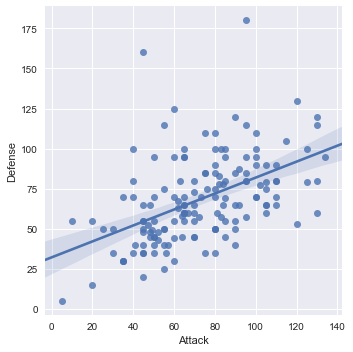

In [15]:
sns.lmplot(x = 'Attack', y = 'Defense', data = df)


**Removing Regression Line and Fixing Axis**

(0, 190.71486004392145)

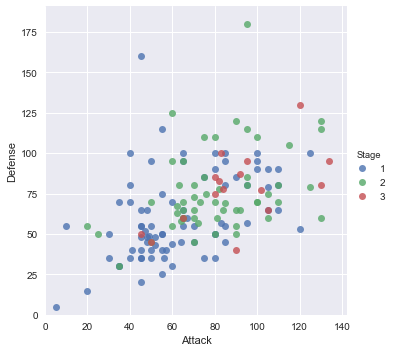

In [20]:
sns.lmplot(x = 'Attack', y = 'Defense', data = df, fit_reg = False, hue = 'Stage')
plt.xlim(0, None)
plt.ylim(0, None)

**Boxplot**

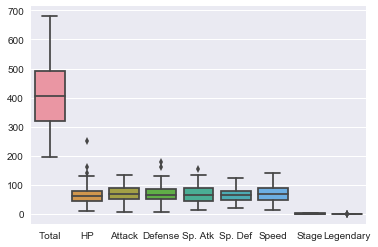

In [21]:
sns.boxplot(data =df)

**Dropping Data**

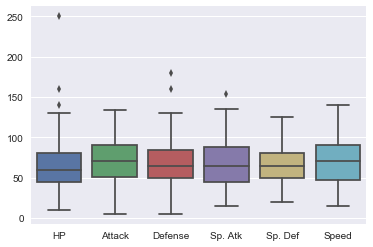

In [23]:
stats_data = df.drop(['Total', 'Stage', 'Legendary'], axis =1)

sns.boxplot(data =stats_data)

**Set Style and Using Violin Plot**

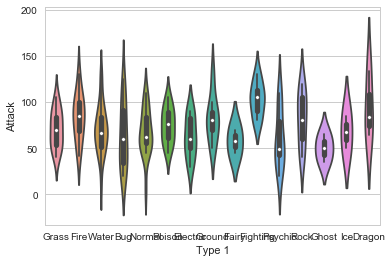

In [26]:
sns.set_style('whitegrid')

sns.violinplot(x= 'Type 1', y = 'Attack', data = df)

**Color Palette**

In [27]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

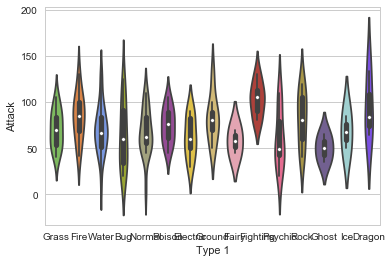

In [29]:
sns.violinplot(x= 'Type 1', y = 'Attack', data = df, palette = pkmn_type_colors)

**Swarm Plot**

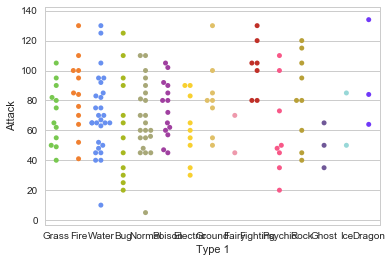

In [31]:
sns.swarmplot( x = 'Type 1', y = 'Attack', data = df, palette = pkmn_type_colors)

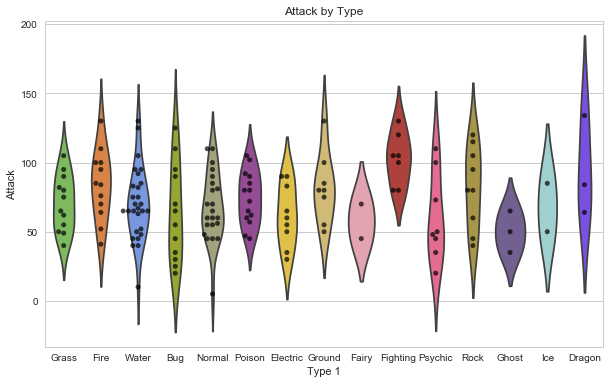

In [33]:
plt.figure(figsize = (10,6))

sns.violinplot(x = 'Type 1', y = 'Attack', data = df, inner = None, palette = pkmn_type_colors)
sns.swarmplot(x = 'Type 1' , y = 'Attack', data = df, color = 'k', alpha = 0.7)
plt.title('Attack by Type')

In [37]:
melted_df = pd.melt(stats_data, id_vars = ['Name', 'Type 1', 'Type 2'], var_name = "Stat")
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


**Shape Comparision**

In [39]:
print stats_data.shape
print melted_df.shape

(151, 9)
(906, 5)


**Swarm Plot with melted df**

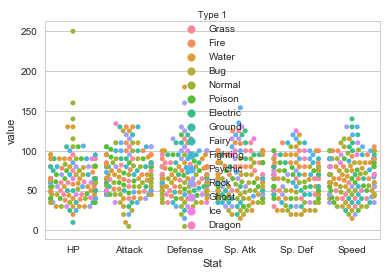

In [40]:
sns.swarmplot(x = 'Stat', y = 'value', data = melted_df, hue = 'Type 1')

**Customize Plot**

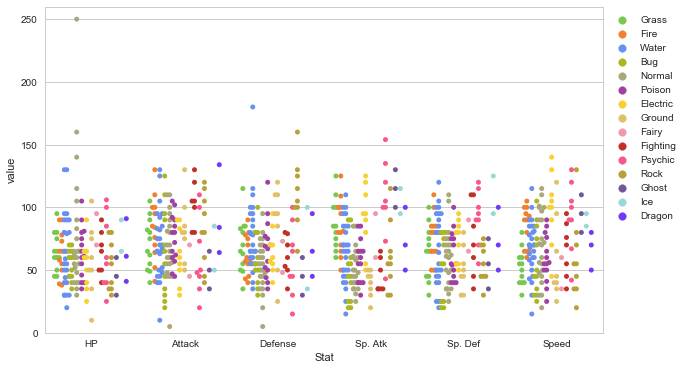

In [42]:
plt.figure(figsize =(10,6))

sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) 
plt.ylim(0,260)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

**Heatmap**

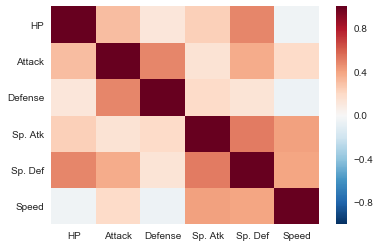

In [43]:
corr = stats_data.corr()
sns.heatmap(corr)

**Histogram**

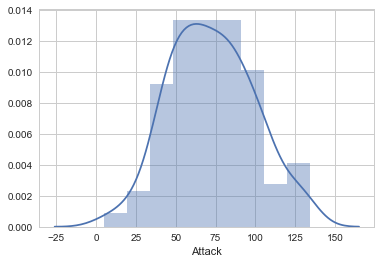

In [44]:
sns.distplot(df.Attack)

**Bar Plot**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

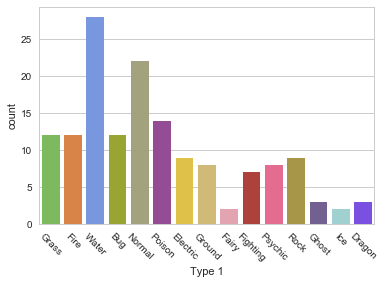

In [48]:
sns.countplot(x = 'Type 1', data = df, palette=pkmn_type_colors )
plt.xticks(rotation = -45)

**Factor Plot**

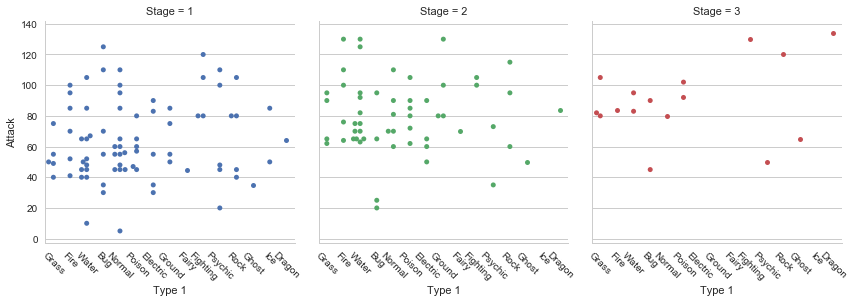

In [52]:
g = sns.factorplot(x = 'Type 1', y = 'Attack', data = df, hue = 'Stage', col = 'Stage', kind = 'swarm')
g.set_xticklabels(rotation = -45)

**Density Plot**

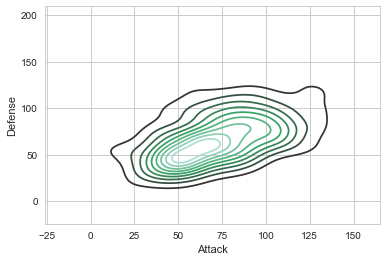

In [53]:
sns.kdeplot(df.Attack, df.Defense)

**Joint Distribution Plot**

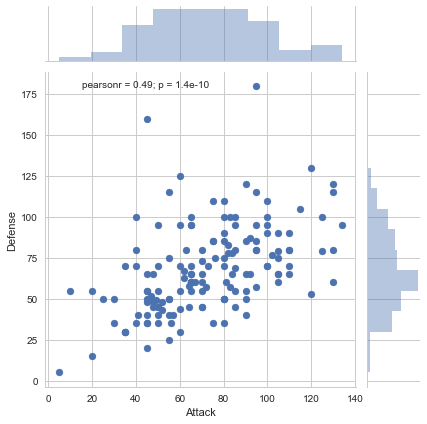

In [56]:
sns.jointplot(x = 'Attack', y= 'Defense', data = df)